In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=7bc95275685dd8e360d26c47403b2d3b89119e6ab3d3bb44dcec40b63670dec1
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
mnist = fetch_openml('Fashion-MNIST', version = 1, as_frame = False)
data = mnist.data
labels = mnist.target.astype(int)

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 42)

In [9]:
som_model = MiniSom(x = 10, y = 10, input_len = X_train.shape[1], sigma = 0.1, learning_rate = 0.5, random_seed = 42)
som_model.random_weights_init(X_train)
som_model.train_random(X_train, num_iteration = 100)

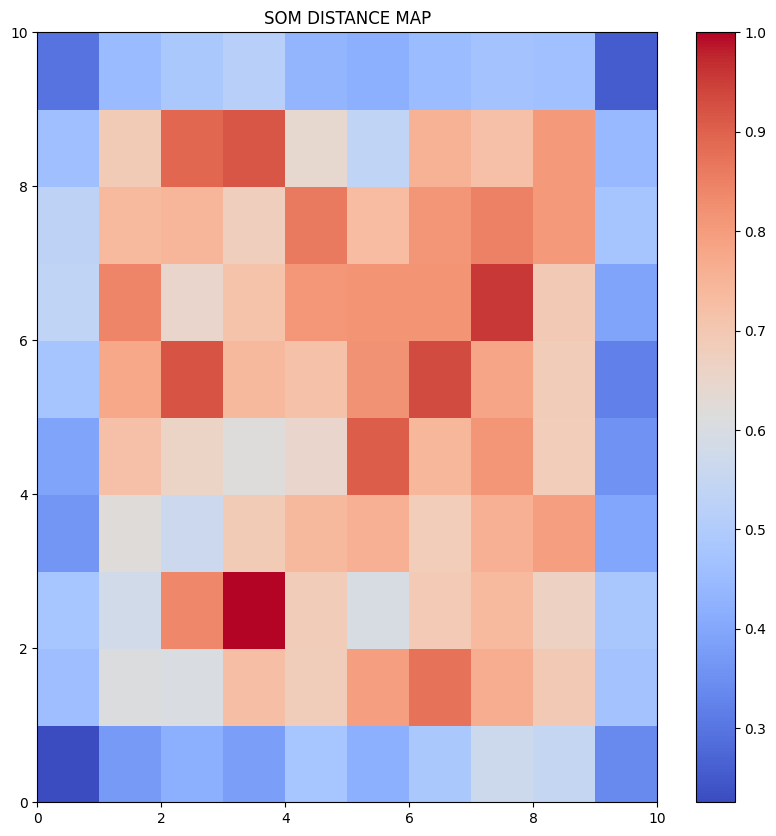

In [10]:
plt.figure(figsize = (10, 10))
plt.pcolor(som_model.distance_map().T, cmap = 'coolwarm')
plt.colorbar()
plt.title("SOM DISTANCE MAP")
plt.show()

In [14]:
def map_labels(som, data, labels):
  label_map = {}
  for x, label in zip(data, labels):
    w = som.winner(x)
    if w not in label_map:
      label_map[w] = []
    label_map[w].append(label)

  for w in label_map:
    label_map[w] = np.bincount(label_map[w]).argmax()
  return label_map

label_map = map_labels(som_model, X_train, Y_train)

def predict(som, data, label_map):
  predictions = []
  for x in data:
    w = som.winner(x)
    predictions.append(label_map.get(w, -1))
  return np.array(predictions)

y_pred = predict(som_model, X_test, label_map)

In [16]:
accuracy = accuracy_score(Y_test, y_pred[y_pred != -1])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 67.11%


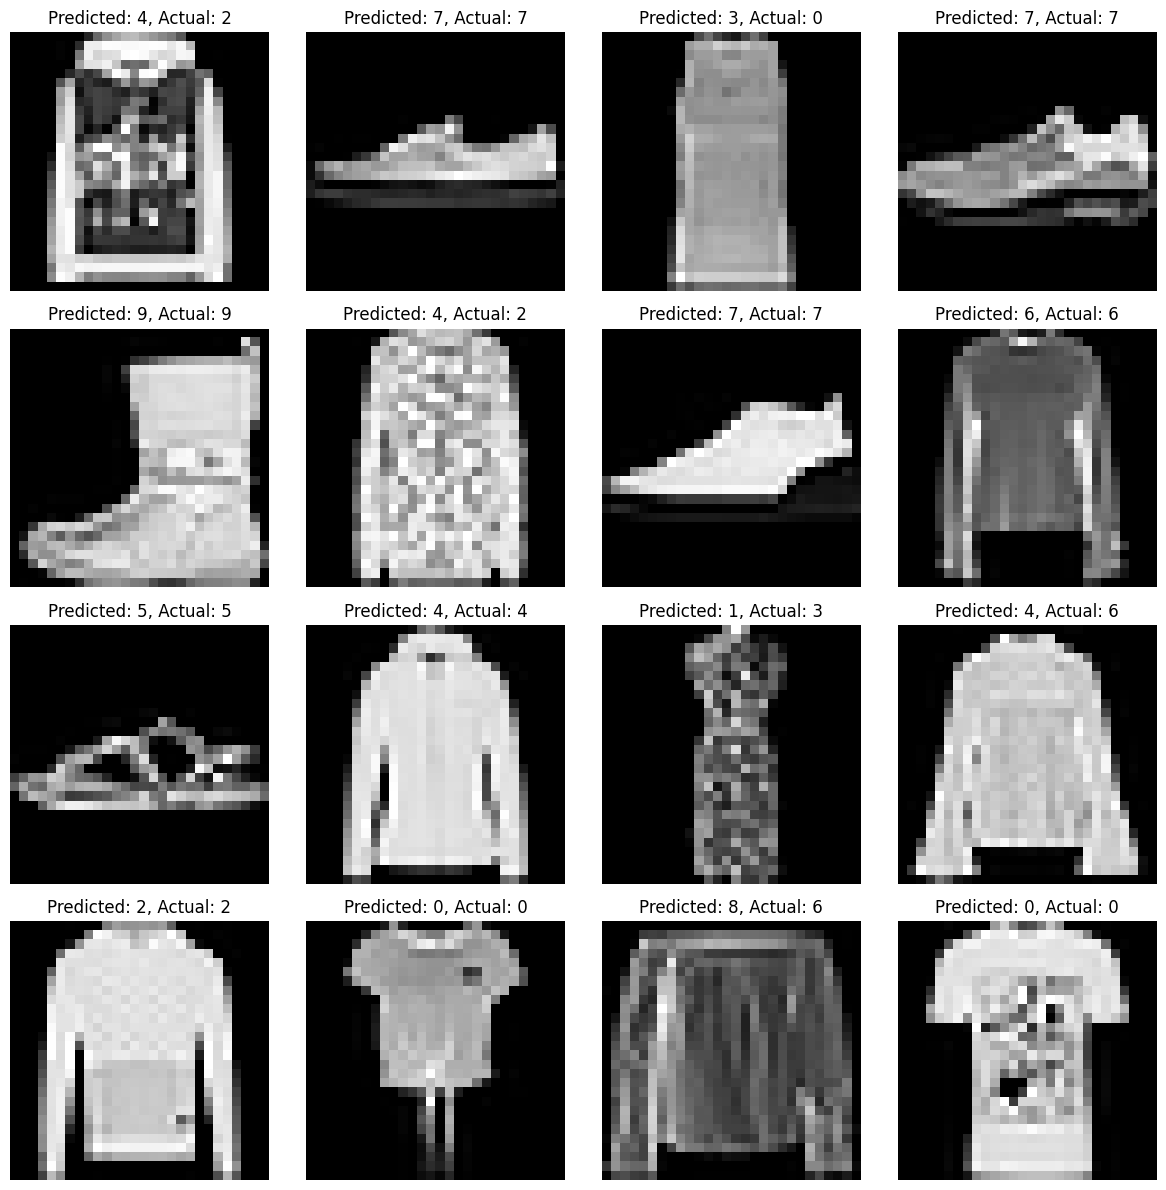

In [17]:
plt.figure(figsize = (12, 12))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
  plt.title(f"Predicted: {y_pred[i]}, Actual: {Y_test[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()